In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Load data
df = pd.read_csv('CompleteResponses.csv', delimiter=',')
df.shape
df.head(10)

,salary,age,elevel,car,zipcode,credit,brand
0,119806.54480,45,0,14,4,442037.71130,0
1,106880.47840,63,1,11,6,45007.17883,1
2,78020.75094,23,0,15,2,48795.32279,0
3,63689.93635,51,3,6,5,40888.87736,1
4,50873.61880,20,3,14,4,352951.49770,0
5,130812.74280,56,3,14,3,135943.02200,1
6,136459.33920,24,4,8,5,80500.56351,1
7,103866.89960,62,3,3,0,359803.89350,1
8,72298.80402,29,4,17,0,276298.69520,0
9,37803.33285,41,1,5,4,493219.26860,1


In [3]:
# Normalize data

# Remove the target column from the DataFrame
target_col = 'brand'
X = df.drop(columns=[target_col])

# Compute the mean and standard deviation of each column
means = X.mean()
stds = X.std()

# Subtract the mean and divide by the standard deviation for each value in each column
for col in X.columns:
    X[col] = (X[col] - means[col]) / stds[col]

# Add the target column back to the DataFrame
df_norm = pd.concat([X, df[target_col]], axis=1)


In [4]:
df_norm.head()

,salary,age,elevel,car,zipcode,credit,brand
0,0.926373,-0.271565,-1.395874,0.602636,-0.015808,1.328143,0
1,0.583618,0.751355,-0.691927,0.082835,0.758768,-1.406009,1
2,-0.181641,-1.521800,-1.395874,0.775903,-0.790384,-1.379922,0
3,-0.561644,0.069408,0.715966,-0.783501,0.371480,-1.434370,1
4,-0.901489,-1.692287,0.715966,0.602636,-0.015808,0.714651,0


,salary,age,elevel,car,zipcode,credit,brand
0,0.926373,-0.271565,-1.395874,0.602636,-0.015808,1.328143,0
1,0.583618,0.751355,-0.691927,0.082835,0.758768,-1.406009,1
2,-0.181641,-1.521800,-1.395874,0.775903,-0.790384,-1.379922,0
3,-0.561644,0.069408,0.715966,-0.783501,0.371480,-1.434370,1
4,-0.901489,-1.692287,0.715966,0.602636,-0.015808,0.714651,0


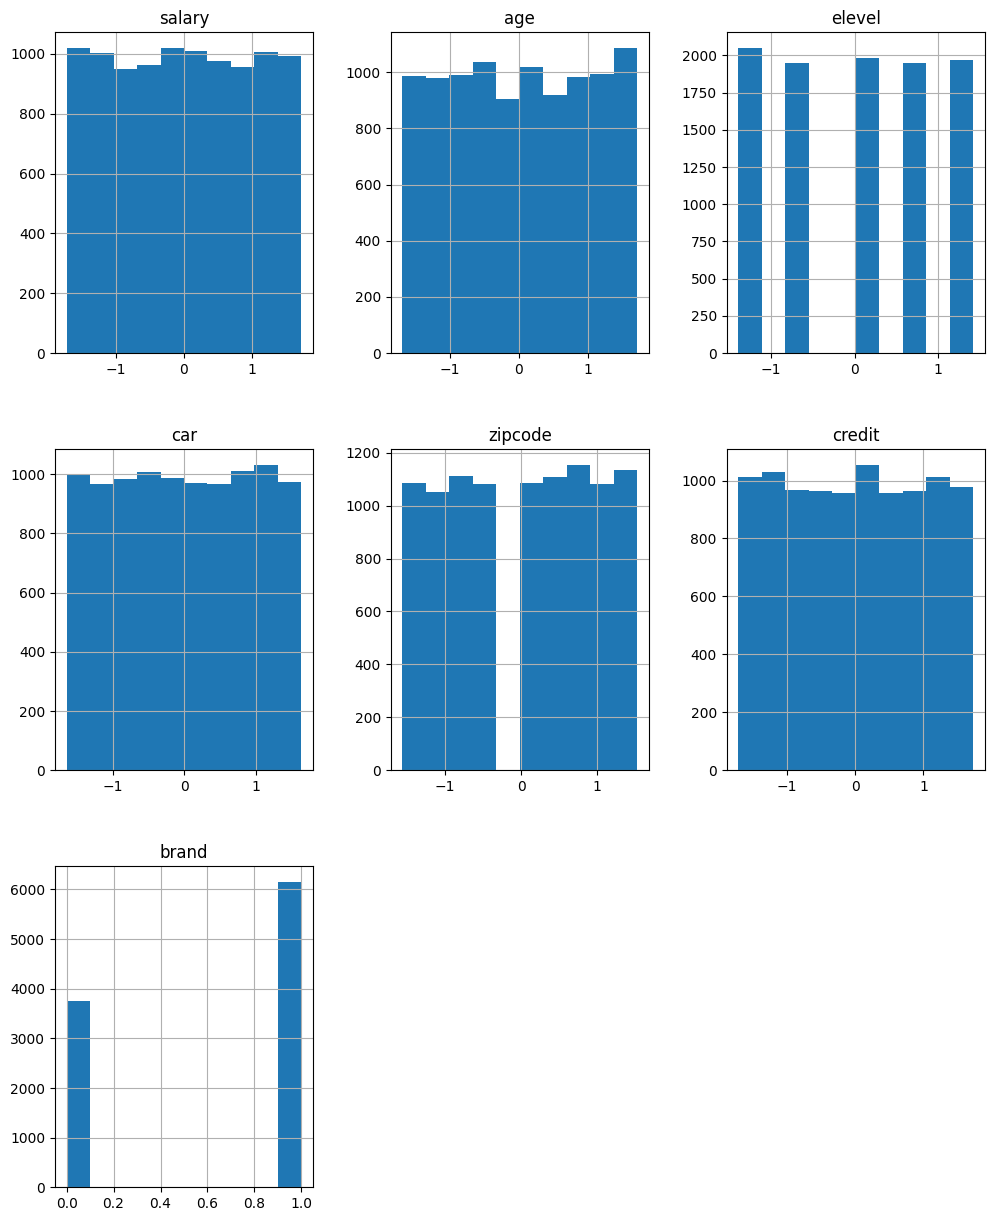

In [5]:
# Plot distributions
df_norm.hist(figsize=(12,15))
df_norm.head()

In [6]:
# Split into features and labels
X = df_norm.iloc[:, :-1].values
y = df_norm.iloc[:, -1].values

In [7]:
# Build multilayer model to overfit data
model = Sequential()

model.add(Dense(1, activation='sigmoid', input_dim=df_norm.shape[1]-1))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [8]:
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
310/310 [==============================] - 1s 1ms/step - loss: 0.9150 - accuracy: 0.4698
Epoch 2/200
310/310 [==============================] - 1s 2ms/step - loss: 0.7785 - accuracy: 0.4990
Epoch 3/200
310/310 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.5588
Epoch 4/200
310/310 [==============================] - 1s 2ms/step - loss: 0.6667 - accuracy: 0.6076
Epoch 5/200
310/310 [==============================] - 1s 3ms/step - loss: 0.6511 - accuracy: 0.6129
Epoch 6/200
310/310 [==============================] - 1s 3ms/step - loss: 0.6450 - accuracy: 0.5963
Epoch 7/200
310/310 [==============================] - 1s 4ms/step - loss: 0.6427 - accuracy: 0.5528
Epoch 8/200
310/310 [==============================] - 2s 5ms/step - loss: 0.6420 - accuracy: 0.5391
Epoch 9/200
310/310 [==============================] - 1s 3ms/step - loss: 0.6417 - accuracy: 0.5297
Epoch 10/200
310/310 [==============================] - 1s 2ms/step - loss: 0.6417 - accura

In [9]:
# Build multilayer model to overfit data
model = Sequential()

model.add(Dense(16, activation='relu', input_dim=df_norm.shape[1]-1))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [10]:
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
310/310 [==============================] - 1s 2ms/step - loss: 0.6312 - accuracy: 0.5935
Epoch 2/100
310/310 [==============================] - 1s 2ms/step - loss: 0.5595 - accuracy: 0.6802
Epoch 3/100
310/310 [==============================] - 1s 2ms/step - loss: 0.4737 - accuracy: 0.7944
Epoch 4/100
310/310 [==============================] - 1s 2ms/step - loss: 0.3748 - accuracy: 0.8407
Epoch 5/100
310/310 [==============================] - 1s 2ms/step - loss: 0.3181 - accuracy: 0.8617
Epoch 6/100
310/310 [==============================] - 1s 3ms/step - loss: 0.2904 - accuracy: 0.8711
Epoch 7/100
310/310 [==============================] - 1s 2ms/step - loss: 0.2756 - accuracy: 0.8779
Epoch 8/100
310/310 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.8835
Epoch 9/100
310/310 [==============================] - 1s 2ms/step - loss: 0.2604 - accuracy: 0.8848
Epoch 10/100
310/310 [==============================] - 1s 2ms/step - loss: 0.2566 - accura